In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from QBUS2820 import rmse_jack, r2_jack 
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
from ExtraCode import getResultTable
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('TrainSalePriceNEW.csv')
y_price = data.pop('SalePrice')


In [53]:
#Extremely Random forest
regr = ExtraTreesRegressor(criterion='mae',max_depth=None,min_samples_split=2)
regr = regr.fit(data,y_price)

#
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(data,y_price)

#Forward selection
from QBUS2820 import forward

fwd = forward()
fwd.fit(data, y_price)


In [54]:
kaggle = pd.read_csv('TestSalePriceNEW.csv')

In [55]:
prediction_T = regr.predict(kaggle)
pred_GB = GBoost.predict(kaggle)
pred_F = fwd.predict(kaggle)

In [56]:
prediction = (prediction_T+pred_F+pred_GB)/3
len(prediction)

1608

In [57]:
#This is for the indices
ind = np.arange(1,1609)

In [58]:
headers = ['Id','Prediction']
predictions = pd.DataFrame({'Id':ind, 'Prediction':prediction})
predictions

,Id,Prediction
0,1,98518.762329
1,2,147706.469947
2,3,138607.831906
3,4,191711.539284
4,5,151433.221133
5,6,339282.146014
6,7,129561.013932
7,8,271363.866886
8,9,112129.272999
9,10,122289.065044


In [59]:
#Saving results into CSV file 
predictions.to_csv("Day4_2.csv", index=False)

In [4]:
#Forward selection
from QBUS2820 import forward

fwd = forward()
fwd.fit(data, y_price)

AttributeError: 'forward' object has no attribute 'params'

# XGBoost Tuning

In [93]:
data = pd.read_csv('Train6.csv')
final_train = data.sample(frac=0.6, random_state=1)
final_test = data[data.index.isin(final_train.index)==False]
final_train.head()
y_train = final_train.pop('SalePrice')
y_test = final_test.pop('SalePrice')


In [14]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear'}
optimized_GBM = GridSearchCV(xgb.XGBRegressor(**ind_params), 
                            cv_params, 
                             scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation

In [15]:
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [17]:
optimized_GBM.grid_scores_

[mean: -13783.45090, std: 918.80661, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: -13875.07333, std: 1114.66367, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: -13354.93034, std: 946.41787, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: -14152.26892, std: 1598.71330, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: -14176.66304, std: 935.64559, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: -13980.26430, std: 1252.29721, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: -14468.35220, std: 1413.62806, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: -14527.32854, std: 1382.86723, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: -13888.80677, std: 1239.51815, params: {'max_depth': 7, 'min_child_weight': 5}]

In [38]:
xgdmat = xgb.DMatrix(final_train, y_train) # Create our DMatrix to make XGBoost more efficient

In [94]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)

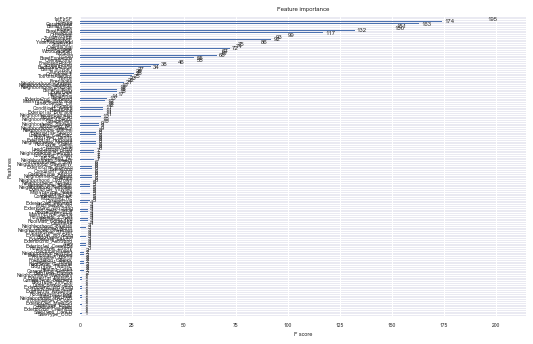

In [56]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 0.5)
xgb.plot_importance(final_gb)

In [57]:
importances = final_gb.get_fscore()
importances

{'1stFlrSF': 195,
 '2ndFlrSF': 75,
 'Alley': 3,
 'BedroomAbvGr': 34,
 'BldgType_1Fam': 3,
 'BldgType_2fmCon': 1,
 'BldgType_Duplex': 2,
 'BldgType_Twnhs': 8,
 'BldgType_TwnhsE': 2,
 'BsmtCond': 11,
 'BsmtExposure': 55,
 'BsmtFinSF1': 132,
 'BsmtFinType1': 27,
 'BsmtFullBath': 18,
 'BsmtQual': 14,
 'BsmtUnfSF': 151,
 'CentralAir': 4,
 'Condition1_Artery': 11,
 'Condition1_Feedr': 1,
 'Condition1_Norm': 6,
 'Condition1_PosA': 5,
 'Condition1_PosN': 7,
 'Condition1_RRAe': 2,
 'Condition2_Norm': 3,
 'Electrical_FuseA': 2,
 'EnclosedPorch': 46,
 'ExterCond': 6,
 'ExterQual': 18,
 'Exterior1st_AsbShng': 1,
 'Exterior1st_BrkFace': 11,
 'Exterior1st_CemntBd': 3,
 'Exterior1st_HdBoard': 8,
 'Exterior1st_MetalSd': 1,
 'Exterior1st_Plywood': 2,
 'Exterior1st_Stucco': 8,
 'Exterior1st_VinylSd': 5,
 'Exterior1st_Wd Sdng': 3,
 'Exterior2nd_AsbShng': 3,
 'Exterior2nd_CmentBd': 1,
 'Exterior2nd_HdBoard': 13,
 'Exterior2nd_ImStucc': 6,
 'Exterior2nd_MetalSd': 1,
 'Exterior2nd_Plywood': 4,
 'Exterior2nd

In [58]:
testdmat = xgb.DMatrix(final_test)

In [59]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
len(y_pred)

322

In [60]:
r2_score(y_test,y_pred)

0.99627841235041936

In [61]:
data = pd.read_csv('Train6.csv')
y_price = data.pop('SalePrice')
kaggle = pd.read_csv('Test6.csv')

xgdmat = xgb.DMatrix(data, y_price) # Create our DMatrix to make XGBoost more efficient

In [62]:
testFinaldmat = xgb.DMatrix(kaggle)

In [63]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)

In [64]:
prediction = final_gb.predict(testFinaldmat)

In [65]:
#This is for the indices
ind = np.arange(1,1609)
headers = ['Id','Prediction']
prediction3 = pd.DataFrame({'Id':ind, 'Prediction':prediction})
prediction3
#Saving results into CSV file 
prediction3.to_csv("Day4_4.csv", index=False)

### It's ok...

In [95]:
pred = []
method = []

data = pd.read_csv('Train6.csv')
final_train = data.sample(frac=0.6, random_state=1)
final_test = data[data.index.isin(final_train.index)==False]
final_train.head()
y_train = final_train.pop('SalePrice')
y_test = final_test.pop('SalePrice')


#Forward selection
fwd = forward()
fwd.fit(final_train, y_train)
predforward = fwd.predict(final_test)
method.append('Forward')
pred.append(predforward)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(final_train,y_train)
predFinalBoost = GBoost.predict(final_test)
method.append('GBoost')
pred.append(predFinalBoost)

regr = AdaBoostRegressor(loss='linear', learning_rate = 1, n_estimators = 350)
regr = regr.fit(final_train,y_train)
adapred = regr.predict(final_test)
method.append('AdaBoost')
pred.append(adapred)

In [96]:
xgdmat = xgb.DMatrix(final_train, y_train) # Create our DMatrix to make XGBoost more efficient
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)
testFinaldmat = xgb.DMatrix(final_test)
xgpred = final_gb.predict(testFinaldmat)
method.append('XGBoost')
pred.append(xgpred)

In [101]:
#print(cross_val_score(final_gb, final_test, y_test)) 
print(cross_val_score(regr, final_test, y_test)) 
#print(cross_val_score(fwd, final_test, y_test)) 
print(cross_val_score(regr2, final_test, y_test)) 

[ 0.85275042  0.82535487  0.80528102]
[ 0.83397613  0.83553196  0.82378095]


In [71]:
pred2 = (xgpred+adapred+predFinalBoost+predforward)/4
pred.append(pred2)
method.append('XGBoost, ada, GB, Forward')

In [72]:
pred3 = (xgpred+predFinalBoost)/2
pred4 = (xgpred+predforward)/2
pred5 = (xgpred+adapred)/2
pred.append(pred3)
pred.append(pred4)
pred.append(pred5)
method.append('xg GB')
method.append('xg forward')
method.append('xg adaboost')

In [98]:
#Extremely Random forest
regr2 = ExtraTreesRegressor(criterion='mae',max_depth=None,min_samples_split=2)
regr2 = regr.fit(final_train,y_train)
predFinalExtRandomForestlad = regr.predict(final_test)

pred5 = (xgpred+predFinalExtRandomForestlad+predFinalBoost+predforward)/4
pred.append(pred5)
method.append('XGBoost, random tree, GB, Forward')

In [74]:
pred6 = (xgpred+predFinalExtRandomForestlad)/2
pred.append(pred6)
method.append('xg Random tree')

In [82]:
getResultTable(method,pred)

,Test RMSE,SE,Jack R2,SE,MAE,R-square
Forward,25043.039,3951.404,0.872,0.037,15656.400,0.872
GBoost,20880.046,3094.883,0.911,0.018,14154.274,0.911
AdaBoost,25768.104,2845.468,0.864,0.019,18608.233,0.864
XGBoost,21428.356,2651.816,0.906,0.015,14314.867,0.906
"XGBoost, ada, GB, Forward",19770.821,2796.710,0.920,0.015,13523.631,0.920
xg GB,20411.829,2935.233,0.915,0.016,13727.156,0.915
xg forward,20348.628,2430.770,0.915,0.014,13517.261,0.915
xg adaboost,22351.224,2877.661,0.898,0.017,15415.433,0.898
"XGBoost, random tree, GB, Forward",18973.230,2461.885,0.926,0.012,13133.117,0.926
xg Random tree,20448.128,2266.275,0.915,0.011,14287.620,0.915


In [81]:
def getResultTable(rows, predictions):
    columns=['Test RMSE', 'SE', 'Jack R2', 'SE', 'MAE', 'R-square']
    results=pd.DataFrame(0.0, columns=columns, index=rows)

    for row,pred in zip(range(0,len(rows)),predictions):
        results.iloc[row,0], results.iloc[row,1] = rmse_jack(y_test, pred)
        results.iloc[row,2], results.iloc[row,3] = (r2_jack(y_test, pred))
        results.iloc[row,4] = mean_absolute_error(y_test, pred)
        results.iloc[row,5] = r2_score(y_test,pred)
    return results.round(3)

# Kaggle Predictions

In [84]:
data = pd.read_csv('Train6.csv')
y_price = data.pop('SalePrice')
kaggle = pd.read_csv('Test6.csv')

xgdmat = xgb.DMatrix(data, y_price) # Create our DMatrix to make XGBoost more efficient
testFinaldmat = xgb.DMatrix(kaggle)

In [85]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)
prediction = final_gb.predict(testFinaldmat)

In [86]:
#Extremely Random forest
regr = ExtraTreesRegressor(criterion='mae',max_depth=None,min_samples_split=2)
regr = regr.fit(data,y_price)
predFinalExtRandomForestlad = regr.predict(kaggle)

In [87]:

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(data,y_price)
predFinalBoost = GBoost.predict(kaggle)


In [88]:
fwd = forward()
fwd.fit(data, y_price)
predforward = fwd.predict(kaggle)

In [90]:
finalprediction = (predforward+predFinalBoost+predFinalExtRandomForestlad+prediction)/4

In [91]:
#This is for the indices
ind = np.arange(1,1609)
headers = ['Id','Prediction']
prediction5 = pd.DataFrame({'Id':ind, 'Prediction':finalprediction})
#Saving results into CSV file 
prediction5.to_csv("Day4_5.csv", index=False)